## In this file, we are analysing the delays occurred of EWR airport from 2018 to 2022 to find out  the main reason for increasing delays at EWR airport in the year 2022.

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#import the modules
import os
import pandas as pd
#read the path
file_path = "D:/UMBC ANIL/Spring 2023/DS 602 ML/Project/Data Set/Aviation Data/csv format"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list


['APM-Report-Delay-2018.csv',
 'APM-Report-Delay-2019.csv',
 'APM-Report-Delay-2020.csv',
 'APM-Report-Delay-2021.csv',
 'APM-Report-Delay-2022.csv']

In [3]:
# combining all the data into single dataframe named 'data'

data = pd.concat([pd.read_csv(f) for f in file_list ], ignore_index=True)
data

,Date,Hour,Scheduled\nDepartures,Scheduled\nArrivals,Departures\nFor Metric\nComputation,Arrivals\nFor Metric\nComputation,% On-Time\nGate\nDepartures,% On-Time\nAirport\nDepartures,% On-Time\nGate\nArrivals,Average\nGate\nDeparture\nDelay,Average\nTaxi\nOut\nTime,Average\nTaxi\nOut\nDelay,Average\nAirport\nDeparture\nDelay,Average\nAirborne\nDelay,Average\nTaxi\nIn\nDelay,Average\nBlock\nDelay,Average\nGate\nArrival\nDelay
0,01-01-2018,0,0,15,0,9,0.00,0.00,55.56,0.00,0.00,0.00,0.00,0.00,1.79,0.00,33.56
1,01-01-2018,1,1,3,1,0,100.00,100.00,0.00,8.00,18.00,5.40,13.00,0.00,0.00,0.00,0.00
2,01-01-2018,2,0,2,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.30,0.00,45.00
3,01-01-2018,3,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,01-01-2018,4,0,4,0,1,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,6.30,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41879,11/30/2022,19,35,39,30,31,46.67,23.33,22.58,51.87,24.03,11.10,62.10,2.42,9.42,5.94,70.61
41880,11/30/2022,20,33,32,25,24,28.00,24.00,29.17,63.48,18.56,6.06,68.60,2.13,4.85,2.13,82.13
41881,11/30/2022,21,30,26,27,20,48.15,51.85,45.00,60.85,17.63,5.06,64.48,1.90,3.89,2.35,41.70
41882,11/30/2022,22,5,16,12,17,41.67,41.67,35.29,21.17,15.92,3.17,23.67,2.41,3.56,3.94,48.65


In [4]:
# converting datatype of 'Date' column into 'datetime' datatype

data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# printing the first five rows

data.head()

,Date,Hour,Scheduled\nDepartures,Scheduled\nArrivals,Departures\nFor Metric\nComputation,Arrivals\nFor Metric\nComputation,% On-Time\nGate\nDepartures,% On-Time\nAirport\nDepartures,% On-Time\nGate\nArrivals,Average\nGate\nDeparture\nDelay,Average\nTaxi\nOut\nTime,Average\nTaxi\nOut\nDelay,Average\nAirport\nDeparture\nDelay,Average\nAirborne\nDelay,Average\nTaxi\nIn\nDelay,Average\nBlock\nDelay,Average\nGate\nArrival\nDelay
0,2018-01-01,0,0,15,0,9,0.0,0.0,55.56,0.0,0.0,0.0,0.0,0.0,1.79,0.0,33.56
1,2018-01-01,1,1,3,1,0,100.0,100.0,0.00,8.0,18.0,5.4,13.0,0.0,0.00,0.0,0.00
2,2018-01-01,2,0,2,0,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,7.30,0.0,45.00
3,2018-01-01,3,0,0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
4,2018-01-01,4,0,4,0,1,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,6.30,0.0,0.00


In [6]:
# viewing the first row with all columns

data.iloc[0,:]

Date                                   2018-01-01 00:00:00
Hour                                                     0
Scheduled\nDepartures                                    0
Scheduled\nArrivals                                     15
Departures\nFor Metric\nComputation                      0
Arrivals\nFor Metric\nComputation                        9
% On-Time\nGate\nDepartures                            0.0
% On-Time\nAirport\nDepartures                         0.0
% On-Time\nGate\nArrivals                            55.56
Average\nGate\nDeparture\nDelay                        0.0
Average\nTaxi\nOut\nTime                               0.0
Average\nTaxi\nOut\nDelay                              0.0
Average\nAirport\nDeparture\nDelay                     0.0
Average\nAirborne\nDelay                               0.0
Average\nTaxi\nIn\nDelay                              1.79
Average\nBlock\nDelay                                  0.0
Average\nGate\nArrival\nDelay                        33.

In [7]:
# info of data frame
# we can see that datatype of 'Date' column is chnaged to 'datetime64

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               41884 non-null  datetime64[ns]
 1   Hour                               41884 non-null  int64         
 2   Scheduled
Departures               41884 non-null  int64         
 3   Scheduled
Arrivals                 41884 non-null  int64         
 4   Departures
For Metric
Computation  41884 non-null  int64         
 5   Arrivals
For Metric
Computation    41884 non-null  int64         
 6   % On-Time
Gate
Departures          41884 non-null  float64       
 7   % On-Time
Airport
Departures       41884 non-null  float64       
 8   % On-Time
Gate
Arrivals            41884 non-null  float64       
 9   Average
Gate
Departure
Delay       41884 non-null  float64       
 10  Average
Taxi
Out
Time             

In [8]:
# renaming the columns of dataframe for clarity

data.rename(columns = {
                        'Scheduled\nDepartures'                   :       'Scheduled Departures',                   
                        'Scheduled\nArrivals'                    :       'Scheduled Arrivals',       
                        'Departures\nFor Metric\nComputation'    :       'Departures For Metric Computation',
                        'Arrivals\nFor Metric\nComputation'      :       'Arrivals For Metric Computation',
                        '% On-Time\nGate\nDepartures'            :       'Percent On-Time Gate Departures',  
                        '% On-Time\nAirport\nDepartures'         :       'Percent On-Time Airport Departures' ,
                        '% On-Time\nGate\nArrivals'              :       'Percent On-Time Gate Arrivals',
                        'Average\nGate\nDeparture\nDelay'        :       'Average Gate Departure Delay',
                        'Average\nTaxi\nOut\nTime'               :       'Average Taxi Out Time',
                        'Average\nTaxi\nOut\nDelay'              :       'Average Taxi Out Delay',
                        'Average\nAirport\nDeparture\nDelay'     :       'Average Airport Departure Delay',
                        'Average\nAirborne\nDelay'               :       'Average Airborne Delay', 
                        'Average\nTaxi\nIn\nDelay'               :       'Average Taxi In Delay',
                        'Average\nBlock\nDelay'                  :       'Average Block Delay',
                        'Average\nGate\nArrival\nDelay'          :       'Average Gate Arrival Delay'                  }, inplace = True)

In [9]:
data.head()

,Date,Hour,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,Percent On-Time Gate Departures,Percent On-Time Airport Departures,Percent On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay
0,2018-01-01,0,0,15,0,9,0.0,0.0,55.56,0.0,0.0,0.0,0.0,0.0,1.79,0.0,33.56
1,2018-01-01,1,1,3,1,0,100.0,100.0,0.00,8.0,18.0,5.4,13.0,0.0,0.00,0.0,0.00
2,2018-01-01,2,0,2,0,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,7.30,0.0,45.00
3,2018-01-01,3,0,0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
4,2018-01-01,4,0,4,0,1,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,6.30,0.0,0.00


In [10]:
# converting percent columns into decimal value columns

data['Num Percent On-Time Gate Departures']     =data['Percent On-Time Gate Departures']/100
data['Num Percent On-Time Airport Departures']  =data['Percent On-Time Airport Departures']/100
data['Num Percent On-Time Gate Arrivals']       =data['Percent On-Time Gate Arrivals']/100

In [11]:
# grouping the 'data' dataframe by date to convert it into date wise data

data_date = data.groupby('Date').agg({
                                 'Scheduled Departures': 'sum', 
                                 'Scheduled Arrivals': 'sum', 
                                 'Departures For Metric Computation': 'sum', 
                                 'Arrivals For Metric Computation': 'sum', 
       
                                 'Num Percent On-Time Gate Departures': 'mean', 
                                 'Num Percent On-Time Airport Departures': 'mean',
                                 'Num Percent On-Time Gate Arrivals': 'mean', 
                                 'Average Gate Departure Delay': 'mean',
                                 'Average Taxi Out Time': 'mean', 
                                 'Average Taxi Out Delay': 'mean',
                                 'Average Airport Departure Delay': 'mean', 
                                 'Average Airborne Delay': 'mean',
                                 'Average Taxi In Delay': 'mean', 
                                 'Average Block Delay': 'mean', 
                                 'Average Gate Arrival Delay': 'mean'      })

In [12]:
# resetting the index 

data_date = data_date.reset_index()

In [13]:
# In 'data_date' dataframe we can see that each row represents a separate date

data_date

,Date,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,Num Percent On-Time Gate Departures,Num Percent On-Time Airport Departures,Num Percent On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay
0,2018-01-01,549,550,547,531,0.517487,0.407700,0.560871,23.457500,17.296250,6.639167,29.165000,2.340000,4.653750,3.830000,27.709583
1,2018-01-02,581,579,602,588,0.535743,0.470187,0.635130,23.937391,16.719565,5.148696,28.038261,3.347826,2.660000,4.132609,29.071739
2,2018-01-03,584,579,620,596,0.581037,0.493267,0.687958,16.913333,17.107917,5.551667,21.146250,2.599583,3.038333,4.060833,20.252500
3,2018-01-04,572,577,75,80,0.389288,0.198217,0.319842,42.665000,23.752500,13.497917,55.420833,12.034167,6.910000,17.245417,44.927083
4,2018-01-05,577,576,484,502,0.233104,0.124254,0.320554,60.633333,22.792083,11.600417,71.763750,2.943333,7.544167,7.857500,77.192083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2022-11-26,505,500,530,513,0.710730,0.555557,0.767061,10.215217,18.216957,7.183478,15.229565,2.123043,3.578696,2.283043,9.914348
1760,2022-11-27,553,553,562,578,0.564300,0.464483,0.551183,23.847083,17.649583,7.079583,29.823750,5.617500,4.447500,6.745417,33.627500
1761,2022-11-28,545,548,580,582,0.632467,0.474167,0.688496,11.945833,18.861250,8.286250,18.567083,1.891250,4.395000,2.476250,12.965000
1762,2022-11-29,521,522,581,587,0.748196,0.632208,0.767771,10.745000,18.985417,7.583750,16.160000,2.615000,5.084583,3.067917,8.777917


In [14]:
data_date.columns

Index(['Date', 'Scheduled Departures', 'Scheduled Arrivals',
       'Departures For Metric Computation', 'Arrivals For Metric Computation',
       'Num Percent On-Time Gate Departures',
       'Num Percent On-Time Airport Departures',
       'Num Percent On-Time Gate Arrivals', 'Average Gate Departure Delay',
       'Average Taxi Out Time', 'Average Taxi Out Delay',
       'Average Airport Departure Delay', 'Average Airborne Delay',
       'Average Taxi In Delay', 'Average Block Delay',
       'Average Gate Arrival Delay'],
      dtype='object')

In [16]:
# Adding year-month column for analysis

data_date['year_month'] = data_date['Date'].dt.strftime('%Y-%m')

In [17]:
data_date

,Date,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,Num Percent On-Time Gate Departures,Num Percent On-Time Airport Departures,Num Percent On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,year_month
0,2018-01-01,549,550,547,531,0.517487,0.407700,0.560871,23.457500,17.296250,6.639167,29.165000,2.340000,4.653750,3.830000,27.709583,2018-01
1,2018-01-02,581,579,602,588,0.535743,0.470187,0.635130,23.937391,16.719565,5.148696,28.038261,3.347826,2.660000,4.132609,29.071739,2018-01
2,2018-01-03,584,579,620,596,0.581037,0.493267,0.687958,16.913333,17.107917,5.551667,21.146250,2.599583,3.038333,4.060833,20.252500,2018-01
3,2018-01-04,572,577,75,80,0.389288,0.198217,0.319842,42.665000,23.752500,13.497917,55.420833,12.034167,6.910000,17.245417,44.927083,2018-01
4,2018-01-05,577,576,484,502,0.233104,0.124254,0.320554,60.633333,22.792083,11.600417,71.763750,2.943333,7.544167,7.857500,77.192083,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2022-11-26,505,500,530,513,0.710730,0.555557,0.767061,10.215217,18.216957,7.183478,15.229565,2.123043,3.578696,2.283043,9.914348,2022-11
1760,2022-11-27,553,553,562,578,0.564300,0.464483,0.551183,23.847083,17.649583,7.079583,29.823750,5.617500,4.447500,6.745417,33.627500,2022-11
1761,2022-11-28,545,548,580,582,0.632467,0.474167,0.688496,11.945833,18.861250,8.286250,18.567083,1.891250,4.395000,2.476250,12.965000,2022-11
1762,2022-11-29,521,522,581,587,0.748196,0.632208,0.767771,10.745000,18.985417,7.583750,16.160000,2.615000,5.084583,3.067917,8.777917,2022-11


In [18]:
# grouping the 'data_date' dataframe by month to convert it into monthly data frame

data_month = data_date.groupby('year_month').agg({
                                 'Scheduled Departures': 'sum', 
                                 'Scheduled Arrivals': 'sum', 
                                 'Departures For Metric Computation': 'sum', 
                                 'Arrivals For Metric Computation': 'sum', 
       
                                 'Num Percent On-Time Gate Departures': 'mean', 
                                 'Num Percent On-Time Airport Departures': 'mean',
                                 'Num Percent On-Time Gate Arrivals': 'mean', 
                                 'Average Gate Departure Delay': 'mean',
                                 'Average Taxi Out Time': 'mean', 
                                 'Average Taxi Out Delay': 'mean',
                                 'Average Airport Departure Delay': 'mean', 
                                 'Average Airborne Delay': 'mean',
                                 'Average Taxi In Delay': 'mean', 
                                 'Average Block Delay': 'mean', 
                                 'Average Gate Arrival Delay': 'mean'      })

In [19]:
data_month.head()

,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,Num Percent On-Time Gate Departures,Num Percent On-Time Airport Departures,Num Percent On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay
year_month,,,,,,,,,,,,,,,
2018-01,16677,16671,16853,16766,0.652692,0.545188,0.679126,16.367907,18.558071,7.305360,21.974824,3.615314,3.485012,5.037425,21.533513
2018-02,15177,15179,15959,15880,0.724802,0.618731,0.724076,13.052681,19.130747,7.541708,18.632498,3.619604,2.946022,4.459170,17.418006
2018-03,17759,17754,17550,17490,0.675078,0.538344,0.705235,15.264126,19.826912,8.813448,22.301880,3.341518,3.147743,4.195581,19.584070
2018-04,17484,17482,18137,18099,0.704721,0.579103,0.689125,16.733141,20.036569,8.830487,23.721889,3.574969,3.195932,4.372307,22.098624
2018-05,18231,18226,19087,19059,0.709424,0.576255,0.712261,14.957168,19.995645,8.680739,21.761776,3.841273,3.145872,5.146886,20.354232


In [20]:
# resetting the index

data_month = data_month.reset_index()

In [21]:
data_month.head()

,year_month,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,Num Percent On-Time Gate Departures,Num Percent On-Time Airport Departures,Num Percent On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay
0,2018-01,16677,16671,16853,16766,0.652692,0.545188,0.679126,16.367907,18.558071,7.305360,21.974824,3.615314,3.485012,5.037425,21.533513
1,2018-02,15177,15179,15959,15880,0.724802,0.618731,0.724076,13.052681,19.130747,7.541708,18.632498,3.619604,2.946022,4.459170,17.418006
2,2018-03,17759,17754,17550,17490,0.675078,0.538344,0.705235,15.264126,19.826912,8.813448,22.301880,3.341518,3.147743,4.195581,19.584070
3,2018-04,17484,17482,18137,18099,0.704721,0.579103,0.689125,16.733141,20.036569,8.830487,23.721889,3.574969,3.195932,4.372307,22.098624
4,2018-05,18231,18226,19087,19059,0.709424,0.576255,0.712261,14.957168,19.995645,8.680739,21.761776,3.841273,3.145872,5.146886,20.354232


In [22]:
# converting the 'year_month' column into 'YYYY-MM-DD' format to extract year and month

data_month['date'] = pd.to_datetime(data_month['year_month'] + '-01')

# Extract the month and year values into separate columns
data_month['month'] = data_month['date'].dt.month
data_month['year'] =data_month['date'].dt.year

In [23]:
data_month.head()

,year_month,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,Num Percent On-Time Gate Departures,Num Percent On-Time Airport Departures,Num Percent On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,date,month,year
0,2018-01,16677,16671,16853,16766,0.652692,0.545188,0.679126,16.367907,18.558071,7.305360,21.974824,3.615314,3.485012,5.037425,21.533513,2018-01-01,1,2018
1,2018-02,15177,15179,15959,15880,0.724802,0.618731,0.724076,13.052681,19.130747,7.541708,18.632498,3.619604,2.946022,4.459170,17.418006,2018-02-01,2,2018
2,2018-03,17759,17754,17550,17490,0.675078,0.538344,0.705235,15.264126,19.826912,8.813448,22.301880,3.341518,3.147743,4.195581,19.584070,2018-03-01,3,2018
3,2018-04,17484,17482,18137,18099,0.704721,0.579103,0.689125,16.733141,20.036569,8.830487,23.721889,3.574969,3.195932,4.372307,22.098624,2018-04-01,4,2018
4,2018-05,18231,18226,19087,19059,0.709424,0.576255,0.712261,14.957168,19.995645,8.680739,21.761776,3.841273,3.145872,5.146886,20.354232,2018-05-01,5,2018


In [24]:
# dropping the 'date' column as we now have individual columns of month and year

data_month = data_month.drop('date', axis=1)

In [25]:
data_month.head()

,year_month,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,Num Percent On-Time Gate Departures,Num Percent On-Time Airport Departures,Num Percent On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,month,year
0,2018-01,16677,16671,16853,16766,0.652692,0.545188,0.679126,16.367907,18.558071,7.305360,21.974824,3.615314,3.485012,5.037425,21.533513,1,2018
1,2018-02,15177,15179,15959,15880,0.724802,0.618731,0.724076,13.052681,19.130747,7.541708,18.632498,3.619604,2.946022,4.459170,17.418006,2,2018
2,2018-03,17759,17754,17550,17490,0.675078,0.538344,0.705235,15.264126,19.826912,8.813448,22.301880,3.341518,3.147743,4.195581,19.584070,3,2018
3,2018-04,17484,17482,18137,18099,0.704721,0.579103,0.689125,16.733141,20.036569,8.830487,23.721889,3.574969,3.195932,4.372307,22.098624,4,2018
4,2018-05,18231,18226,19087,19059,0.709424,0.576255,0.712261,14.957168,19.995645,8.680739,21.761776,3.841273,3.145872,5.146886,20.354232,5,2018


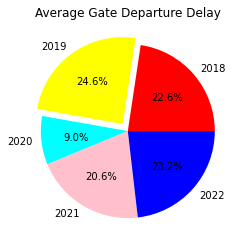

In [27]:
# pie chart of Average Gate Departure Delay per year

labels=["2018","2019","2020","2021","2022"]
colors = ['red', 'yellow', 'cyan', 'pink','blue']

l1=[]
var="Average Gate Departure Delay"
title="Average Gate Departure Delay"

l1.append(data_month[data_month.year == 2018][var].mean())
l1.append(data_month[data_month.year == 2019][var].mean())
l1.append(data_month[data_month.year == 2020][var].mean())
l1.append(data_month[data_month.year == 2021][var].mean())
l1.append(data_month[data_month.year == 2022][var].mean())

plt.title(title)
plt.pie(l1, labels=labels, colors=colors,autopct="%1.1f%%", explode=[0.1 if x == max(l1) else 0 for x in l1])
plt.show()

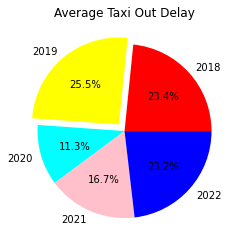

In [28]:
# pie chart of Average Taxi Out Delay per year

labels=["2018","2019","2020","2021","2022"]
colors = ['red', 'yellow', 'cyan', 'pink','blue']

l2=[]
var="Average Taxi Out Delay"
title="Average Taxi Out Delay"

l2.append(data_month[data_month.year == 2018][var].mean())
l2.append(data_month[data_month.year == 2019][var].mean())
l2.append(data_month[data_month.year == 2020][var].mean())
l2.append(data_month[data_month.year == 2021][var].mean())
l2.append(data_month[data_month.year == 2022][var].mean())

plt.title(title)
plt.pie(l2, labels=labels, colors=colors,autopct="%1.1f%%", explode=[0.1 if x == max(l2) else 0 for x in l2])
plt.show()

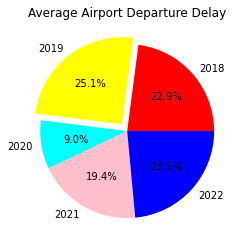

In [29]:
# pie chart of Average Airport Departure Delay per year

labels=["2018","2019","2020","2021","2022"]
colors = ['red', 'yellow', 'cyan', 'pink','blue']

l3=[]
var="Average Airport Departure Delay"
title="Average Airport Departure Delay"

l3.append(data_month[data_month.year == 2018][var].mean())
l3.append(data_month[data_month.year == 2019][var].mean())
l3.append(data_month[data_month.year == 2020][var].mean())
l3.append(data_month[data_month.year == 2021][var].mean())
l3.append(data_month[data_month.year == 2022][var].mean())

plt.title(title)
plt.pie(l3, labels=labels, colors=colors,autopct="%1.1f%%", explode=[0.1 if x == max(l3) else 0 for x in l3])
plt.show()

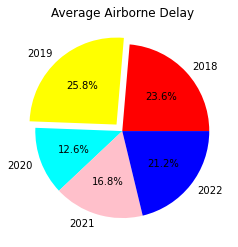

In [30]:
# pie chart of Average Airborne Delay per year

labels=["2018","2019","2020","2021","2022"]
colors = ['red', 'yellow', 'cyan', 'pink','blue']

l4=[]
var="Average Airborne Delay"
title="Average Airborne Delay"

l4.append(data_month[data_month.year == 2018][var].mean())
l4.append(data_month[data_month.year == 2019][var].mean())
l4.append(data_month[data_month.year == 2020][var].mean())
l4.append(data_month[data_month.year == 2021][var].mean())
l4.append(data_month[data_month.year == 2022][var].mean())

plt.title(title)
plt.pie(l4, labels=labels, colors=colors,autopct="%1.1f%%", explode=[0.1 if x == max(l4) else 0 for x in l4])
plt.show()

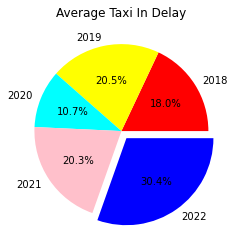

In [31]:
# pie chart of Average Taxi In Delay per year

labels=["2018","2019","2020","2021","2022"]
colors = ['red', 'yellow', 'cyan', 'pink','blue']

l5=[]
var="Average Taxi In Delay"
title="Average Taxi In Delay"

l5.append(data_month[data_month.year == 2018][var].mean())
l5.append(data_month[data_month.year == 2019][var].mean())
l5.append(data_month[data_month.year == 2020][var].mean())
l5.append(data_month[data_month.year == 2021][var].mean())
l5.append(data_month[data_month.year == 2022][var].mean())

plt.title(title)
plt.pie(l5, labels=labels, colors=colors,autopct="%1.1f%%", explode=[0.1 if x == max(l5) else 0 for x in l5])
plt.show()

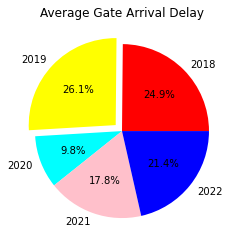

In [32]:
# pie chart of Average Gate Arrival Delay per year

labels=["2018","2019","2020","2021","2022"]
colors = ['red', 'yellow', 'cyan', 'pink','blue']

l6=[]
var="Average Gate Arrival Delay"
title="Average Gate Arrival Delay"

l6.append(data_month[data_month.year == 2018][var].mean())
l6.append(data_month[data_month.year == 2019][var].mean())
l6.append(data_month[data_month.year == 2020][var].mean())
l6.append(data_month[data_month.year == 2021][var].mean())
l6.append(data_month[data_month.year == 2022][var].mean())

plt.title(title)
plt.pie(l6, labels=labels, colors=colors,autopct="%1.1f%%", explode=[0.1 if x == max(l6) else 0 for x in l6])
plt.show()

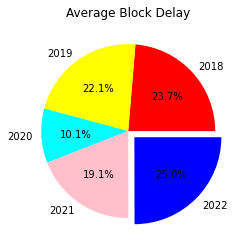

In [33]:
# pie chart of Average Block Delay per year

labels=["2018","2019","2020","2021","2022"]
colors = ['red', 'yellow', 'cyan', 'pink','blue']

l7=[]
var="Average Block Delay"
title="Average Block Delay"

l7.append(data_month[data_month.year == 2018][var].mean())
l7.append(data_month[data_month.year == 2019][var].mean())
l7.append(data_month[data_month.year == 2020][var].mean())
l7.append(data_month[data_month.year == 2021][var].mean())
l7.append(data_month[data_month.year == 2022][var].mean())

plt.title(title)
plt.pie(l7, labels=labels, colors=colors,autopct="%1.1f%%", explode=[0.1 if x == max(l7) else 0 for x in l7])
plt.show()

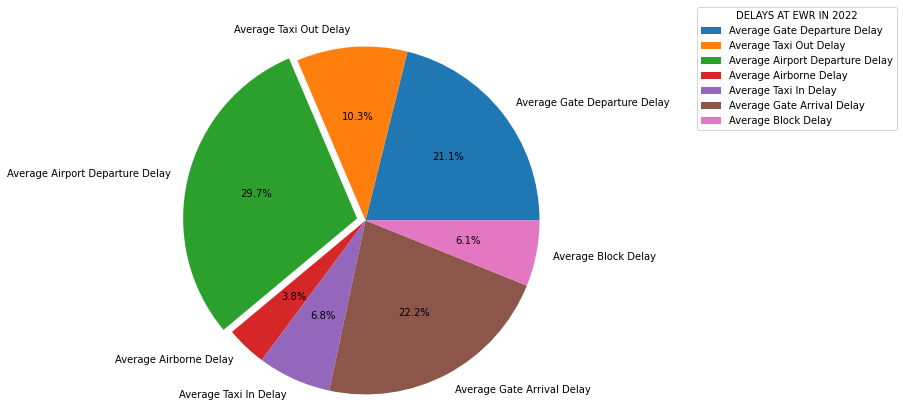

In [34]:
# PIE CHART OF DELAYS AT EWR IN 2022

labels=["Average Gate Departure Delay","Average Taxi Out Delay","Average Airport Departure Delay",
        "Average Airborne Delay","Average Taxi In Delay","Average Gate Arrival Delay","Average Block Delay"]


l=[]

l.append(data_month[data_month.year == 2022]["Average Gate Departure Delay"].mean())
l.append(data_month[data_month.year == 2022]["Average Taxi Out Delay"].mean())
l.append(data_month[data_month.year == 2022]["Average Airport Departure Delay"].mean())
l.append(data_month[data_month.year == 2022]["Average Airborne Delay"].mean())
l.append(data_month[data_month.year == 2022]["Average Taxi In Delay"].mean())
l.append(data_month[data_month.year == 2022]["Average Gate Arrival Delay"].mean())
l.append(data_month[data_month.year == 2022]["Average Block Delay"].mean())

plt.pie(l, labels=labels ,autopct="%1.1f%%", explode=[0.1 if x == max(l) else 0 for x in l], radius=2)

plt.legend(title="DELAYS AT EWR IN 2022",loc='center left', bbox_to_anchor=(2, 1.2))
plt.show()

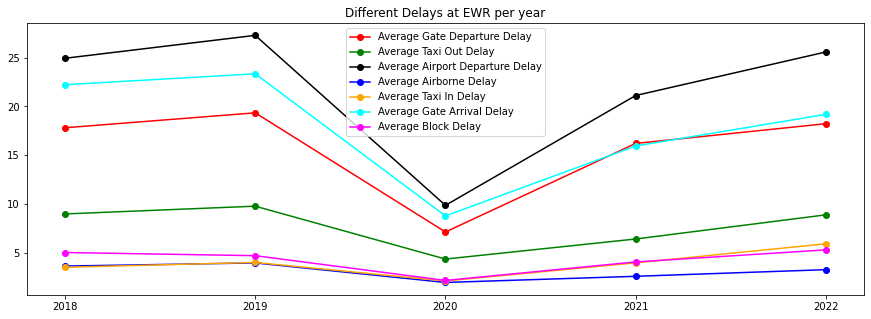

In [35]:
# Line plot of Different Delays at EWR per year

values=["2018","2019","2020","2021","2022"]


l=[]
var="Average Gate Departure Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.figure(figsize=(15, 5))
plt.title("Different Delays at EWR per year")
plt.plot(l,marker="o",color="red", label=var)



l=[]
var="Average Taxi Out Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="green", label=var)


l=[]
var="Average Airport Departure Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="black", label=var)


l=[]
var="Average Airborne Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="blue", label=var)


l=[]
var="Average Taxi In Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="orange", label=var)


l=[]
var="Average Gate Arrival Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="cyan", label=var)



l=[]
var="Average Block Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="magenta", label=var)


plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

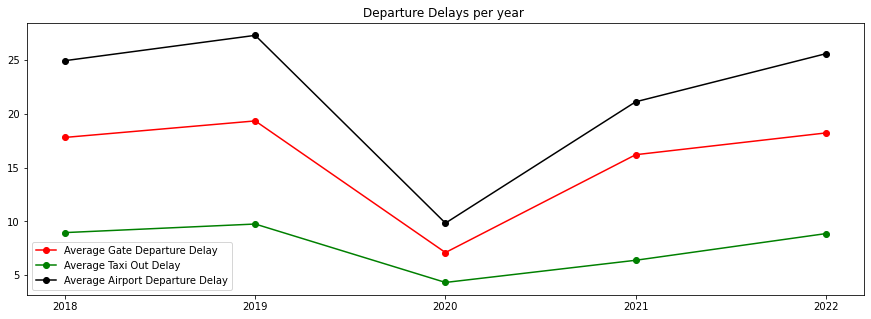

In [36]:
# Line plot of Average Airport Departure Delays


values=["2018","2019","2020","2021","2022"]


l=[]
var="Average Gate Departure Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.figure(figsize=(15, 5))
plt.title("Departure Delays per year ")
plt.plot(l,marker="o",color="red", label=var)



l=[]
var="Average Taxi Out Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="green", label=var)


l=[]
var="Average Airport Departure Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="black", label=var)


plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

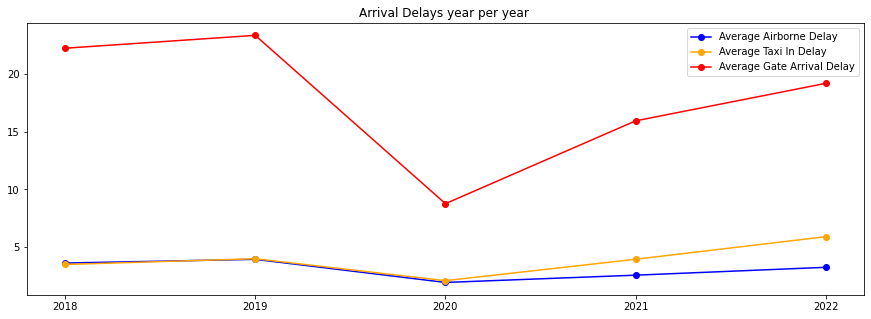

In [37]:
# Line plot of Average Gate Arrival Delays

values=["2018","2019","2020","2021","2022"]

l=[]
var="Average Airborne Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())


plt.figure(figsize=(15, 5))
plt.title("Arrival Delays year per year ")
plt.plot(l,marker="o",color="blue", label=var)


l=[]
var="Average Taxi In Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="orange", label=var)


l=[]
var="Average Gate Arrival Delay"

l.append(data_month[data_month.year == 2018][var].mean())
l.append(data_month[data_month.year == 2019][var].mean())
l.append(data_month[data_month.year == 2020][var].mean())
l.append(data_month[data_month.year == 2021][var].mean())
l.append(data_month[data_month.year == 2022][var].mean())

plt.plot(l,marker="o",color="red", label=var)


plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

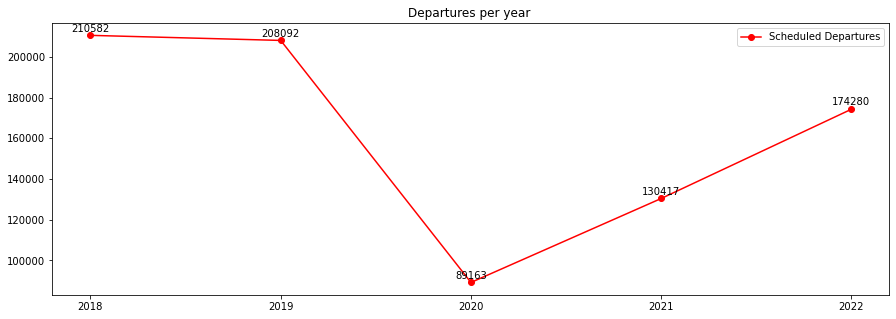

In [38]:
# Line plot of departures per year

l=[]
var="Scheduled Departures"

l.append(data_month[data_month.year == 2018][var].sum())
l.append(data_month[data_month.year == 2019][var].sum())
l.append(data_month[data_month.year == 2020][var].sum())
l.append(data_month[data_month.year == 2021][var].sum())
l.append(data_month[data_month.year == 2022][var].sum())

plt.figure(figsize=(15, 5))
plt.title("Departures per year ")
plt.plot(l,marker="o",color="red", label=var)

plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)

# add text labels for each data point
for i, j in zip(range(len(l)), l):
    plt.text(i, (j+1000), str(j), ha='center', va='bottom')

plt.show()

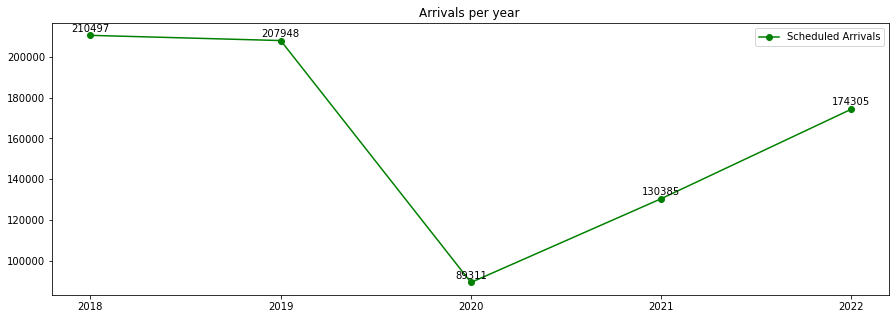

In [39]:
# Line plot of arrivals per year

values=["2018","2019","2020","2021","2022"]

l=[]
var="Scheduled Arrivals"

l.append(data_month[data_month.year == 2018][var].sum())
l.append(data_month[data_month.year == 2019][var].sum())
l.append(data_month[data_month.year == 2020][var].sum())
l.append(data_month[data_month.year == 2021][var].sum())
l.append(data_month[data_month.year == 2022][var].sum())
plt.figure(figsize=(15, 5))
plt.title("Arrivals per year ")

plt.plot(l,marker="o",color="green", label=var)
plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)



# add text labels for each data point
for i, j in zip(range(len(l)), l):
    plt.text(i, (j+1000), str(j), ha='center', va='bottom')


plt.show()